In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [2]:
out_dir = os.path.join(os.getcwd(), "../../out")

In [3]:
def plot_data(ax, data, x, y):
    sns.scatterplot(x=data[x], y=data[y], ax=ax)
    ax.set_xlim(0, df[x].max() + 1)
    ax.set_ylim(0, df[y].max() + 500)

def plot_model(ax, data, x, y, expert_model):
    plot_data(ax, data, x, y)
    y_hat = data[x].apply(expert_model)
    sns.lineplot(x=data[x], y=y_hat, color='orange', ax=ax)

def get_hard_coded_model(beta_0, beta_1):
    def model(x1):
        return beta_0 + beta_1 * x1
    return model

def plot_betas_combinations(df, axes, x, y, betas_combinations):
    for ax, beta_0, beta_1 in zip(
        axes.flatten(),
        *zip(*betas_combinations),
    ):
        ax.title.set_text(f'Gesetzt | beta_0 = {beta_0}, beta_1 = {beta_1}')
        plot_model(ax, df, x, y, get_hard_coded_model(beta_0 = beta_0, beta_1 = beta_1))
    plt.tight_layout()
    plt.show()


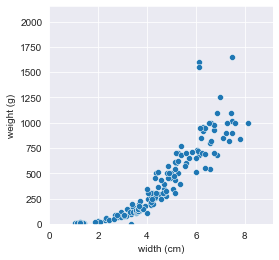

In [4]:
df = pd.read_csv('data/fish.csv')[['Width', 'Weight']].rename(columns={
    'Width': 'width (cm)',
    'Weight': 'weight (g)'
})

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(ax, df, 'width (cm)', 'weight (g)')

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  # Erstellen vom Modell

lr.fit(X=df[['width (cm)']].values, y=df['weight (g)'])  # Modell lernt (Lernphase)

example = 5 # 5cm
y_hat = lr.predict(X=[[example]])  # Modell anwenden (Anwendungsphase)

print(f"Vorhersage für {example}cm ist {round(y_hat[0])}g")  # Ausgeben vom Resultat auf die Konsole

Vorhersage für 5cm ist 508g


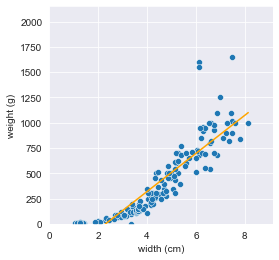

In [6]:
_, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_model(ax, df, 'width (cm)', 'weight (g)', lambda x: lr.predict([[x]])[0])
plt.savefig(os.path.join(out_dir, 'data-with-linear-regression-model-1d.png'), bbox_inches='tight')
plt.show()

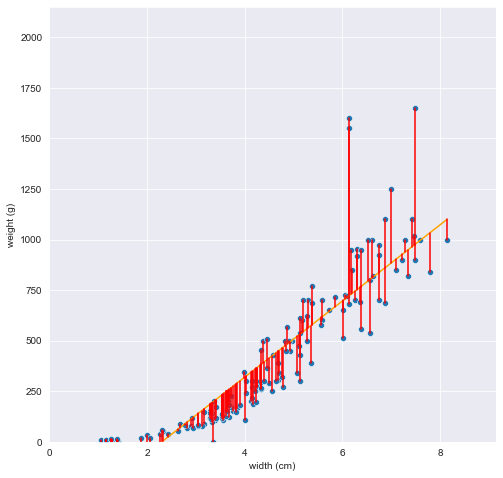

In [7]:
def plot_model_with_errors(ax, df: pd.DataFrame, x: str, y: str, expert_model):
    def plot_error(row):
        # draw line from real point (media_income, media_house_value) to predicted point (media_income, media_house_value_hat)
        ax.plot([row[x], row[x]], [row[y], row['y_hat']], c='red')
    df = df.copy()
    plot_model(ax, df, x, y, expert_model)
    df['y_hat'] = df[x].apply(expert_model)
    df.apply(plot_error, axis=1)

_, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_model_with_errors(ax, df, 'width (cm)', 'weight (g)', lambda x: lr.predict(np.array(x).reshape(-1, 1))[0])
plt.savefig(os.path.join(out_dir, 'linear-regression-model-residuals.png'), bbox_inches='tight')
plt.show()

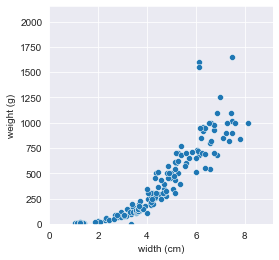

In [8]:
df = pd.read_csv('data/fish.csv').rename(columns={
    'Length1': 'length (cm)',
    'Width': 'width (cm)',
    'Weight': 'weight (g)'
})

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(ax, df, 'width (cm)', 'weight (g)')
plt.savefig(os.path.join(out_dir, 'data.png'), bbox_inches='tight')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  # Erstellen vom Modell

_ = lr.fit(X=df[['width (cm)', 'length (cm)']], y=df['weight (g)'])  # Modell lernt (Lernphase)

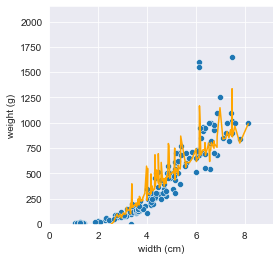

In [10]:
def plot_model_2f_2d(ax, data, x1, x2, y, model: LinearRegression):
    plot_data(ax, data, x1, y)
    xs = data[[x1, x2]]
    y_hat = model.predict(xs)
    sns.lineplot(x=xs[x1], y=y_hat, color='orange', ax=ax)

_, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_model_2f_2d(ax, df, 'width (cm)', 'length (cm)', 'weight (g)', lr)
plt.show()

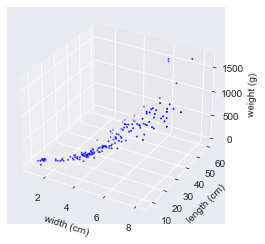

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


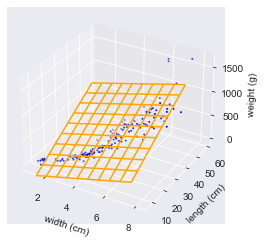

In [15]:
def get_grid(s_df, x_dim, y_dim, x1: str, x2: str):
    p1, p2 = np.mgrid[:x_dim, :y_dim]
    p1 = p1 * ((s_df[x1].max() - s_df[x1].min()) / 10) + s_df[x1].min()
    p2 = p2 * ((s_df[x2].max() - s_df[x2].min()) / 10) + s_df[x2].min()
    p1p2 = np.vstack([ p1.reshape(-1), p2.reshape(-1)]).transpose()
    return p1, p2, p1p2

def plot_data_2d(df, x1: str, x2: str, y: str):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel(x1)
    ax.set_ylabel(x2)
    ax.set_zlabel(y)
    ax.scatter(df[x1], df[x2], df[y], c='blue', s=1, marker='o')
    return ax

def plot_model_2d(df, x1: str, x2: str, y: str, model):
    ax = plot_data_2d(df, x1, x2, y)

    p1, p2, p1p2 = get_grid(df, 10, 10, x1, x2)
    ax.plot_wireframe(p1, p2, model.predict(p1p2).reshape(10, 10), color='orange')
    return ax


ax = plot_data_2d(df, 'width (cm)', 'length (cm)', 'weight (g)')
plt.savefig(os.path.join(out_dir, 'data-2d.png'), bbox_inches='tight')
plt.show()

ax2 = plot_model_2d(df, 'width (cm)', 'length (cm)', 'weight (g)', lr)
ax2.set_xlim(ax.get_xlim())
ax2.set_ylim(ax.get_ylim())
ax2.set_zlim(ax.get_zlim())
plt.savefig(os.path.join(out_dir, 'data-with-linear-regression-model-2d.png'), bbox_inches='tight')
plt.show()

In [ ]:
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lr', LinearRegression())
])

_ = model.fit(X=df[['width (cm)']], y=df['weight (g)'])  # Modell lernt (Lernphase)

_, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_model(ax, df, 'width (cm)', 'weight (g)', lambda x: model.predict([[x]])[0])
plt.savefig(os.path.join(out_dir, 'polynomial-regression.png'), bbox_inches='tight')
plt.show()

In [ ]:
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lr', LinearRegression())
])

_ = model.fit(X=df[['width (cm)', 'length (cm)']], y=df['weight (g)'])  # Modell lernt (Lernphase)

plot_model_2d(df, 'width (cm)', 'length (cm)', 'weight (g)', model)
plt.savefig(os.path.join(out_dir, 'polynomial-regression-2d.png'), bbox_inches='tight')
plt.show()